# Configuración Inicial

In [18]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/miguepoloc/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/miguepoloc/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/miguepoloc/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/miguepoloc/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/miguepoloc/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/miguepoloc/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date

#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [3]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [4]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

<Axes: xlabel='Samples', ylabel='Counts'>

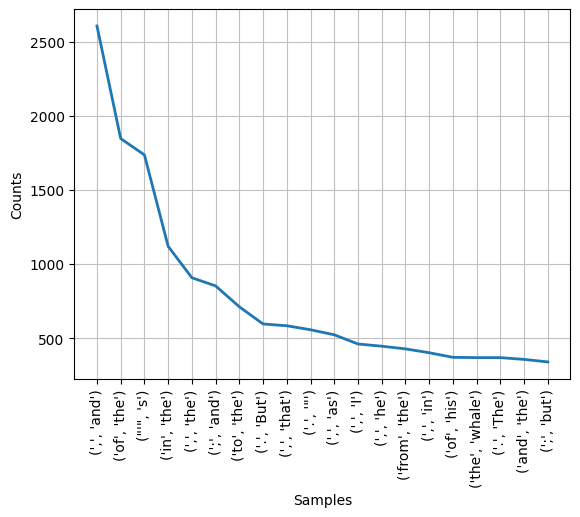

In [5]:
fdist.plot(20)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

<Axes: xlabel='Samples', ylabel='Counts'>

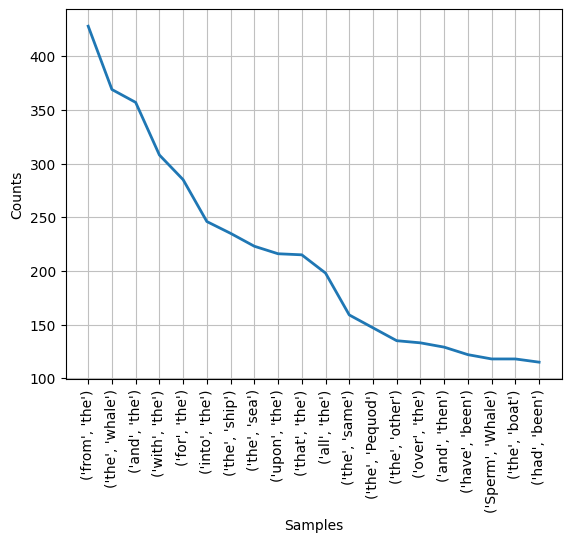

In [6]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [7]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [8]:
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

<Axes: xlabel='Samples', ylabel='Counts'>

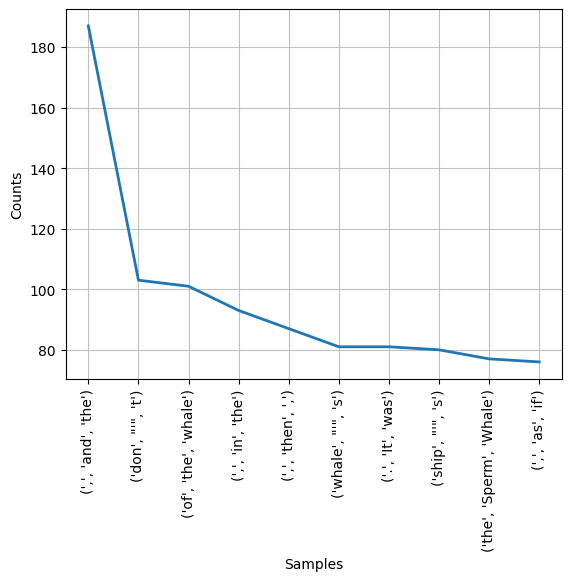

In [9]:
fdist.plot(10)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [10]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(very, queer)",very,queer,3,311,44
1,"(all, cursing)",all,cursing,1,1462,1
2,"(here, alluded)",here,alluded,2,272,6
3,"(the, frightened)",the,frightened,3,13721,6
4,"(his, hot)",his,hot,1,2459,23
...,...,...,...,...,...,...
67937,"(truth, was)",truth,was,1,30,1632
67938,"(become, pursed)",become,pursed,1,28,1
67939,"(emptied, into)",emptied,into,1,3,520
67940,"(And, has)",And,has,1,369,287


# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [11]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(very, queer)",very,queer,3,311,44,-12.155240,1.584963
1,"(all, cursing)",all,cursing,1,1462,1,-10.513728,0.000000
2,"(here, alluded)",here,alluded,2,272,6,-9.672425,1.000000
3,"(the, frightened)",the,frightened,3,13721,6,-14.744098,1.584963
4,"(his, hot)",his,hot,1,2459,23,-15.787418,0.000000
...,...,...,...,...,...,...,...,...
67937,"(truth, was)",truth,was,1,30,1632,-15.579316,0.000000
67938,"(become, pursed)",become,pursed,1,28,1,-4.807355,0.000000
67939,"(emptied, into)",emptied,into,1,3,520,-10.607330,0.000000
67940,"(And, has)",And,has,1,369,287,-16.692384,0.000000


In [12]:
df.sort_values(by = 'PMI', ascending=False)

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
21807,"(IMPOSING, WAY)",IMPOSING,WAY,1,1,1,0.000000,0.0
38346,"(surly, dabs)",surly,dabs,1,1,1,0.000000,0.0
3497,"(unmisgiving, hardihood)",unmisgiving,hardihood,1,1,1,0.000000,0.0
18742,"(gloomiest, reserve)",gloomiest,reserve,1,1,1,0.000000,0.0
33839,"(Gayer, sallies)",Gayer,sallies,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
22036,"(man, the)",man,the,1,508,13721,-22.732783,0.0
25555,"(some, the)",some,the,1,578,13721,-22.919024,0.0
36305,"(one, the)",one,the,1,889,13721,-23.540138,0.0
23626,"(the, not)",the,not,1,13721,1103,-23.851315,0.0


In [19]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values, 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Medidas pre-construidas en NLTK

In [20]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [21]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en Español 

In [22]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents() 
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to
[nltk_data]     /Users/miguepoloc/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [23]:
print(corpus[0])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']


In [24]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [25]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)
*   

